# Meteorite Visualization

## Introduction:

Meteoroids are what we call “space rocks” that range in size from dust grains to small asteroids. This term only applies when they’re in space. 
Meteorites that fall to Earth represent some of the original, diverse materials that formed planets billions of years ago. These include the age and composition of different planetary building blocks, the temperatures achieved at the surfaces and interiors of asteroids, and the degree to which materials were shocked by impacts in the past.

We think the dataset of meteorite is fascinating and we can analyze various data related to the meteorite. 

The dataset is from Meteoritical Society which contains information on all of the known meteorite landings.


In [1]:
from IPython.display import Image
from sklearn import preprocessing

import json
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import traitlets
import ipywidgets

## Part 1
#### Choose the Earth Meteorite Landings JSON file.

In [2]:
with open("Earth_Meteorite_Landings.json") as f:
    data = json.load(f)

In [3]:
# print(json.dumps(data, indent=2))

In [4]:
data[0]

{'name': 'Aachen',
 'id': '1',
 'nametype': 'Valid',
 'recclass': 'L5',
 'mass': '21',
 'fall': 'Fell',
 'year': '1880-01-01T00:00:00.000',
 'reclat': '50.775000',
 'reclong': '6.083330',
 'geolocation': {'type': 'Point', 'coordinates': [6.08333, 50.775]}}

In [5]:
df = pd.read_json("Earth_Meteorite_Landings.json")
df.mass.value_counts()
df = df.drop([":@computed_region_cbhk_fwbd", ":@computed_region_nnqa_25f4"], axis=1)
# df = df.astype(str)

In [6]:
# df['mass']
df.mass.value_counts()

4000.0     15
1000.0     14
2000.0     13
6000.0     13
5000.0     12
           ..
968.0       1
288.0       1
1915.0      1
2910.0      1
65500.0     1
Name: mass, Length: 639, dtype: int64

In [7]:
new_df = df.drop(df[df.mass == 'nan'].index)
new_df['year'] = new_df['year'].astype(str)
new_df = new_df.drop(new_df[new_df.year == '<NA>'].index)
# new_df.mass.value_counts()
new_df["mass"] = np.floor(pd.to_numeric(new_df["mass"], errors='coerce')).astype('Int64')
# new_df = new_df[new_df["mass"] > 500000]
# new_df.mass.value_counts()

new_df['year'] = pd.to_datetime(df['year'], errors = 'coerce')
new_df['year'] = new_df['year'].dt.year.astype('Int64')
new_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."
...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13..."
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29..."
997,Tjabe,24011,Valid,H6,20000,Fell,1869,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -..."
998,Tjerebon,24012,Valid,L5,16500,Fell,1922,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -..."


## Plot the number of meteorites (top five)

<AxesSubplot:title={'center':'Number of meteorites (top five)'}, xlabel='year'>

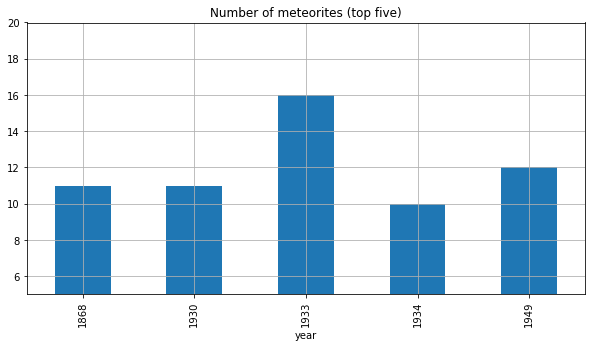

In [8]:
number_by_year_top_five_df = new_df.year.value_counts().rename_axis('year').reset_index(name='counts')
number_by_year_top_five_df = number_by_year_top_five_df.nlargest(5, 'counts', keep='first')
number_by_year_top_five_df = number_by_year_top_five_df.set_index('year')
number_by_year_top_five_df = number_by_year_top_five_df.sort_values(by=['year'])
number_by_year_top_five_df['counts'].plot(kind='bar', grid=True, figsize=(10,5), 
                                          ylim=(5, 20), title='Number of meteorites (top five)')




In [9]:
new_df['number_by_year'] = new_df.groupby(['year'])['year'].transform('count').astype('Int64')
new_df = new_df.dropna()
new_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,number_by_year
0,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",5
1,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",6
2,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",5
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",10
4,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",7
...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",10
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29...",4
997,Tjabe,24011,Valid,H6,20000,Fell,1869,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",6
998,Tjerebon,24012,Valid,L5,16500,Fell,1922,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",6


## Plot the largest mass of meteorites (top five).

<AxesSubplot:title={'center':'Mass of meteorites (top five)'}, xlabel='year'>

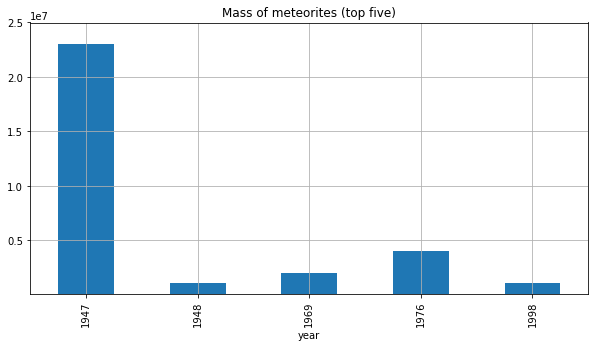

In [10]:
mass_top_five_df = new_df.nlargest(5, 'mass', keep='all')
mass_top_five_df = mass_top_five_df.sort_values(by=['year'])
mass_top_five_df = mass_top_five_df.set_index('year')
mass_top_five_df['mass'].plot(kind='bar', grid=True, figsize=(10,5), 
                              ylim=(40000, 25000000), title='Mass of meteorites (top five)')

## Plot the Earth Meteorite Landings Map (sketch)

In [11]:
lat = []
lon = []
for i in range(len(new_df['reclat'])):
    try:
        lat.append(new_df['reclat'][i])
        lon.append(new_df['reclong'][i])
    except:
        continue

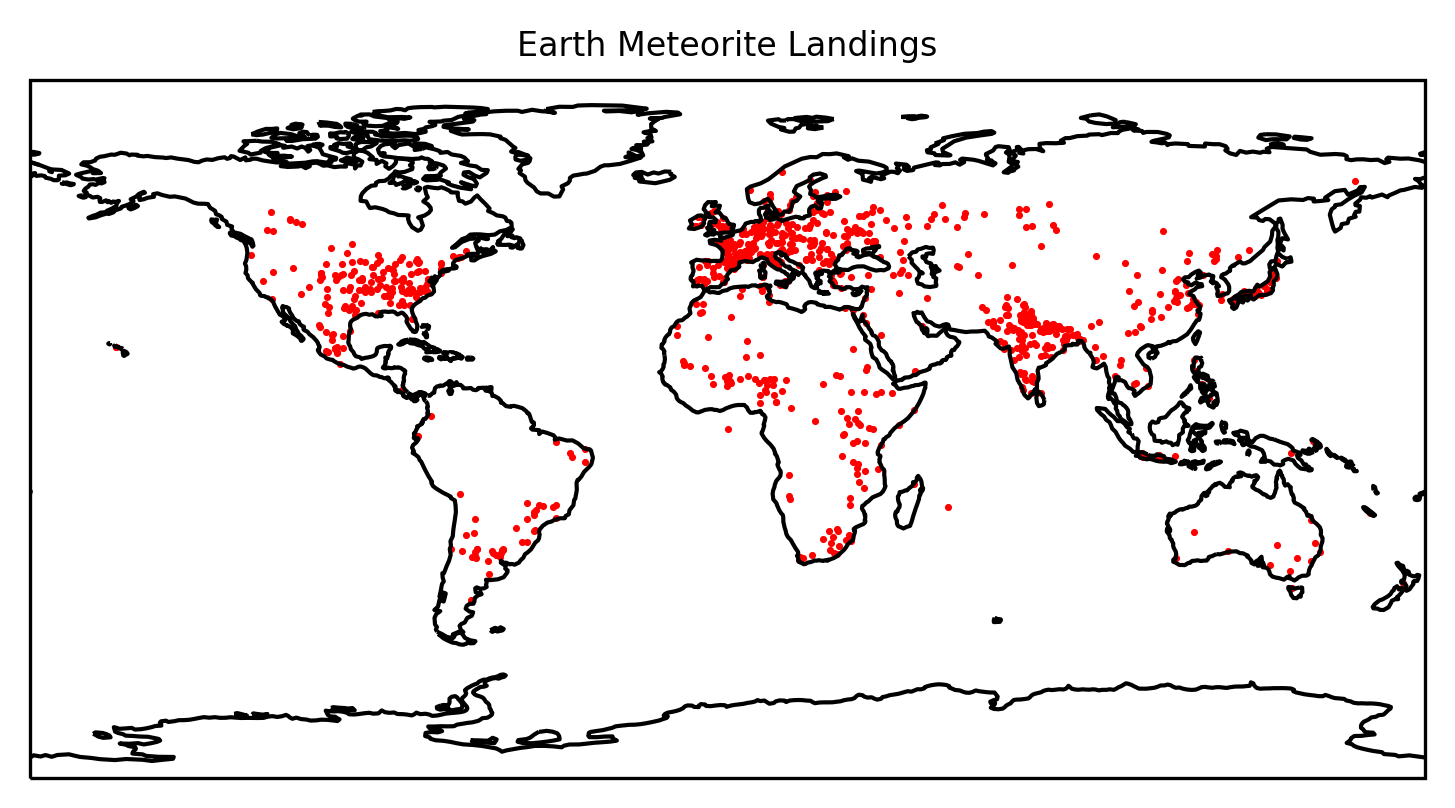

In [12]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.scatter([lon], [lat], s=0.5, color="red")
ax.coastlines()
ax.set_title('Earth Meteorite Landings', fontsize=8)
ax.set_global()

## Plot the Earth Meteorite Landings Map

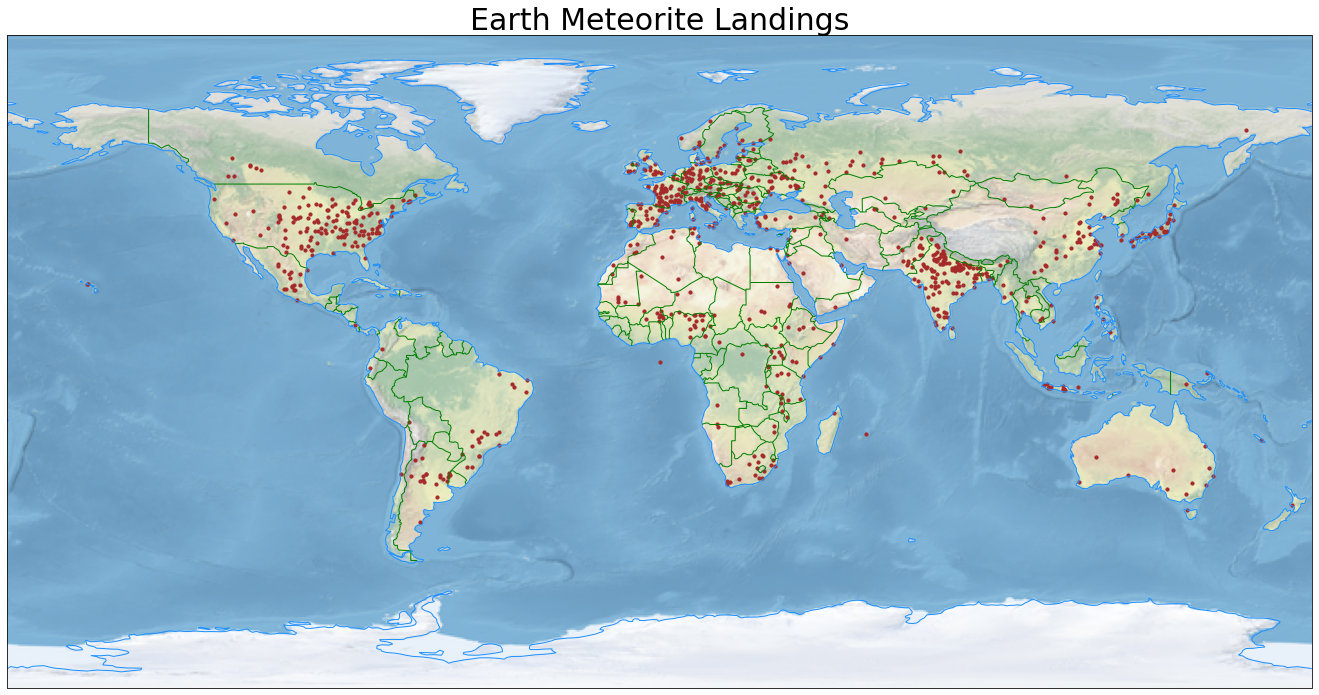

In [13]:
fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(1,1,1, projection=cartopy.crs.PlateCarree())
ax.stock_img()
plt.scatter(x=[lon], y=[lat],
            color="brown",
            s=10,
            alpha=1,
            transform=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.COASTLINE, edgecolor="dodgerblue")
ax.add_feature(cartopy.feature.BORDERS, edgecolor="green")

ax.set_title('Earth Meteorite Landings', fontsize=30)
ax.set_global()


plt.show()


### Use a vega-lite visualization to analyze Earth Meteorite Landings dataset.
### Three steps:
### 1. Develop a visualization using vega-lite using the Earth Meteorite Landings data.
### 2. Deploy this visualization in JSON format.
### 3. Write the initialization javascript code to create the visualization.

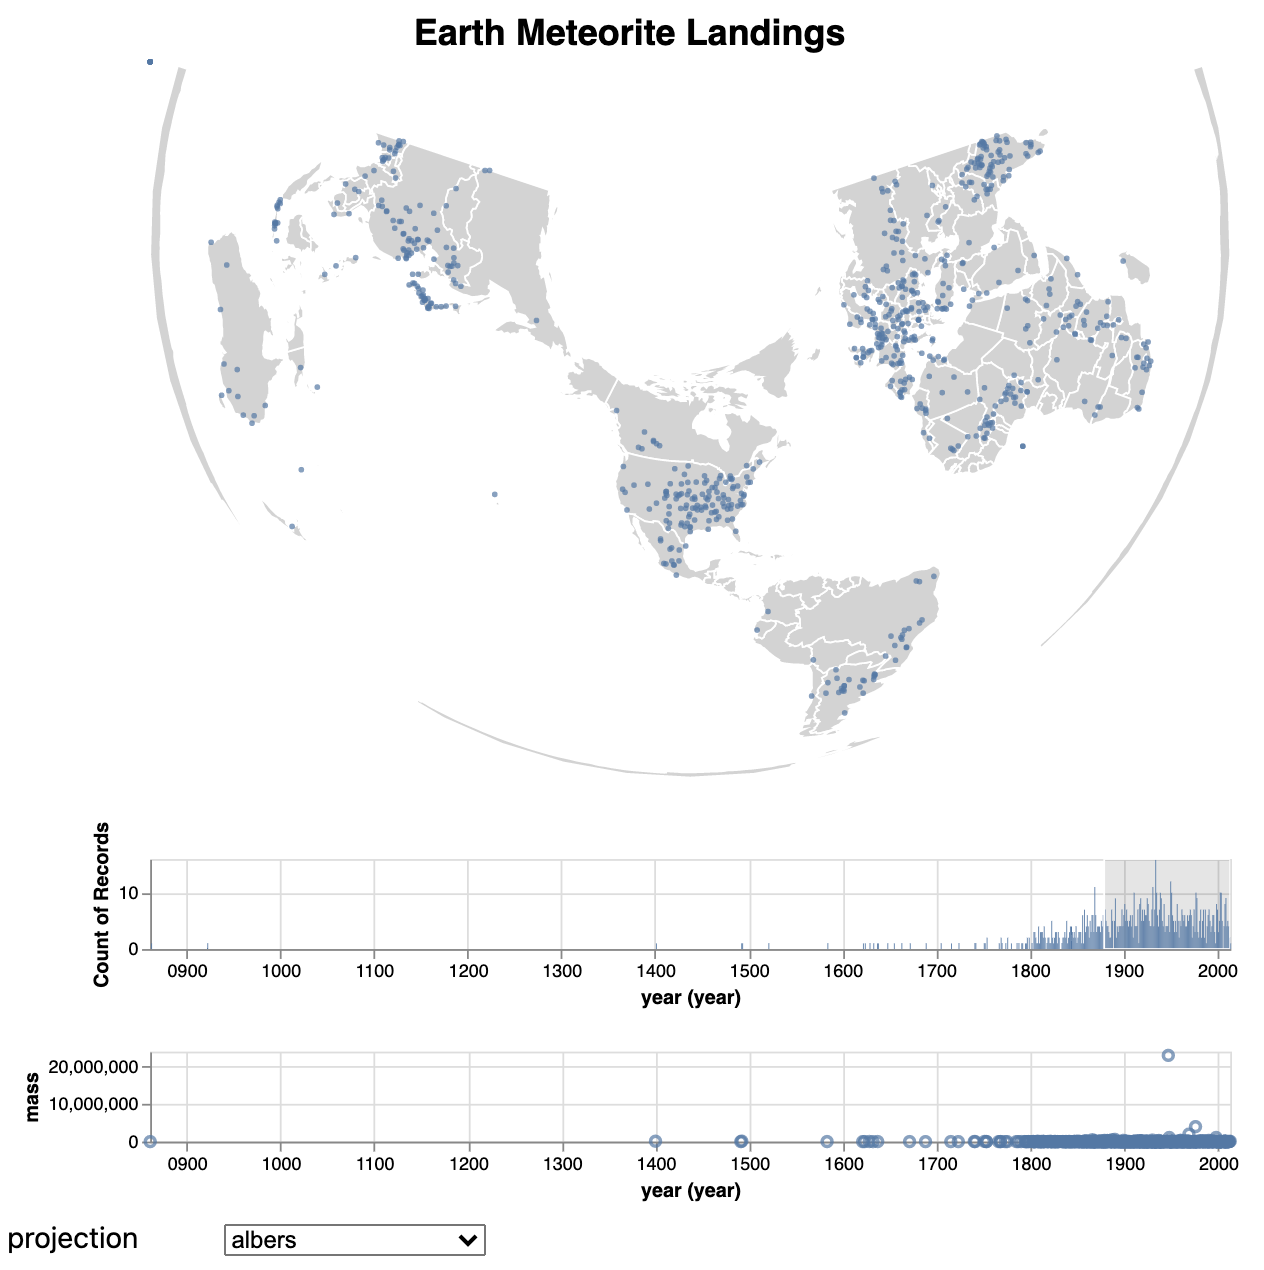

Vegalite visualization: https://reurl.cc/pxEqaZ

## Part 2

In [14]:
df_mass = df

In [15]:
df_mass.isna().sum()

name            0
id              0
nametype        0
recclass        0
mass           28
fall            0
year            1
reclat         12
reclong        12
geolocation    12
dtype: int64

In [16]:
df_mass =  df_mass[df_mass["mass"].isna() == False]
df_mass =  df_mass[df_mass["year"].isna() == False]

In [17]:
df_mass["recclass"].value_counts()

L6              237
H5              140
H6               77
L5               68
H4               48
               ... 
Iron, IIE-an      1
L3.6              1
LL3.2             1
H5-7              1
H/L3.6            1
Name: recclass, Length: 117, dtype: int64

In [18]:
df_mass['year'] = pd.to_datetime(df_mass['year'], errors = 'coerce')
df_mass['year'] = df_mass['year'].dt.year.astype('Int64')
df_mass.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."


## Most frequent recorded classes of meteorite fall

In [19]:
df_count  = df_mass.groupby(by="recclass")["id"].count().reset_index()

In [20]:
df_count["recclass"].value_counts()

Acapulcoite    1
L/LL6          1
L5/6           1
L5-6           1
L5             1
              ..
H/L4           1
H/L3.9         1
H/L3.6         1
H              1
Winonaite      1
Name: recclass, Length: 117, dtype: int64

In [21]:
df_freq = df_count.sort_values(by="id", ascending=False)[0:10]

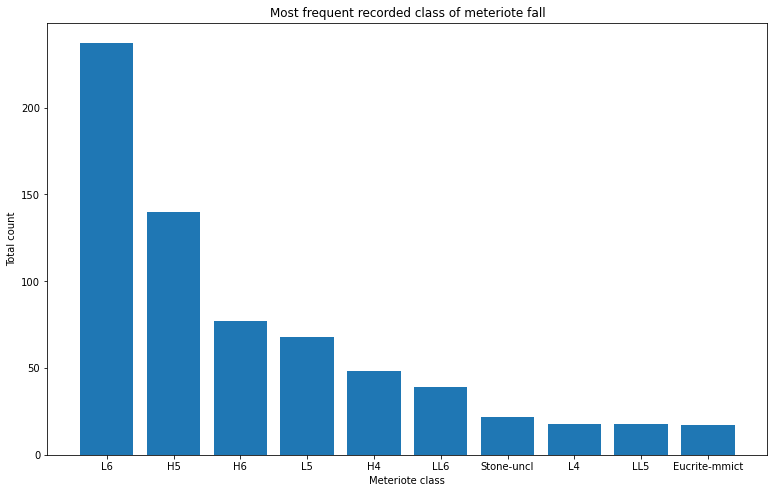

In [22]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(x=df_freq["recclass"],height=df_freq["id"],width=0.8)
ax.set_title("Most frequent recorded class of meteriote fall")
ax.set_xlabel("Meteriote class")
ax.set_ylabel("Total count")
plt.show()

Comments:The main idea is to find out which class of meteorite is frequently observed (out of 117 in total), 
and visualize top 10 meteorite classes with their counts. 
L6 is the most frequent class 
of meteorite observed in the data


## Distribution of most frequent recorded classes of meteorite fall over the years

In [23]:
most_freq_classes = list(df_freq.recclass)

In [24]:
df_mass_freq = df_mass[df_mass["recclass"].isin(most_freq_classes)]

In [25]:
df_mass_freq.reset_index(inplace=True, drop=True)

In [26]:
df_mass_freq.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."
3,Agen,392,Valid,H5,30000.0,Fell,1814,44.21667,0.61667,"{'type': 'Point', 'coordinates': [0.61667, 44...."
4,Aguada,398,Valid,L6,1620.0,Fell,1930,-31.60000,-65.23333,"{'type': 'Point', 'coordinates': [-65.23333, -..."


In [27]:
df_mass_freq = df_mass_freq.dropna()

In [28]:
def classify_years(row):
    if (row["year"] >= 1900) and (row["year"] <= 1925):
        return "1900-1925"
    elif (row["year"] > 1925) and (row["year"] <= 1950):
        return "1925-1950"
    elif (row["year"] > 1950) and (row["year"] <= 1975):
        return "1950-1975"
    elif (row["year"] > 1975) and (row["year"] <= 2000):
        return "1975-2000"
    else:
        return "Above 2000"

In [29]:
df_mass_freq["class"] = df_mass_freq.apply(lambda row: classify_years(row), axis=1)

In [30]:
df_stacked = df_mass_freq.groupby(["class","recclass"]).count()["id"].reset_index()

In [31]:
df_stacked.head()

,class,recclass,id
0,1900-1925,Eucrite-mmict,4
1,1900-1925,H4,7
2,1900-1925,H5,19
3,1900-1925,H6,7
4,1900-1925,L4,3


In [32]:
df_stacked = df_stacked.pivot(index="class",columns="recclass", values="id").reset_index()

In [33]:
df_stacked = df_stacked.fillna(0)
df_stacked

recclass,class,Eucrite-mmict,H4,H5,H6,L4,L5,L6,LL5,LL6,Stone-uncl
0,1900-1925,4.0,7.0,19.0,7.0,3.0,12.0,41.0,2.0,3.0,3.0
1,1925-1950,3.0,9.0,17.0,13.0,4.0,10.0,38.0,4.0,8.0,1.0
2,1950-1975,2.0,11.0,17.0,13.0,3.0,8.0,22.0,1.0,7.0,0.0
3,1975-2000,1.0,3.0,20.0,8.0,1.0,10.0,32.0,3.0,4.0,2.0
4,Above 2000,7.0,18.0,67.0,36.0,5.0,28.0,100.0,7.0,15.0,9.0


In [34]:
df_stacked.columns

Index(['class', 'Eucrite-mmict', 'H4', 'H5', 'H6', 'L4', 'L5', 'L6', 'LL5',
       'LL6', 'Stone-uncl'],
      dtype='object', name='recclass')

<AxesSubplot:title={'center':'Stacked Bar Graph od meteorite class per 25year interval'}, xlabel='class'>

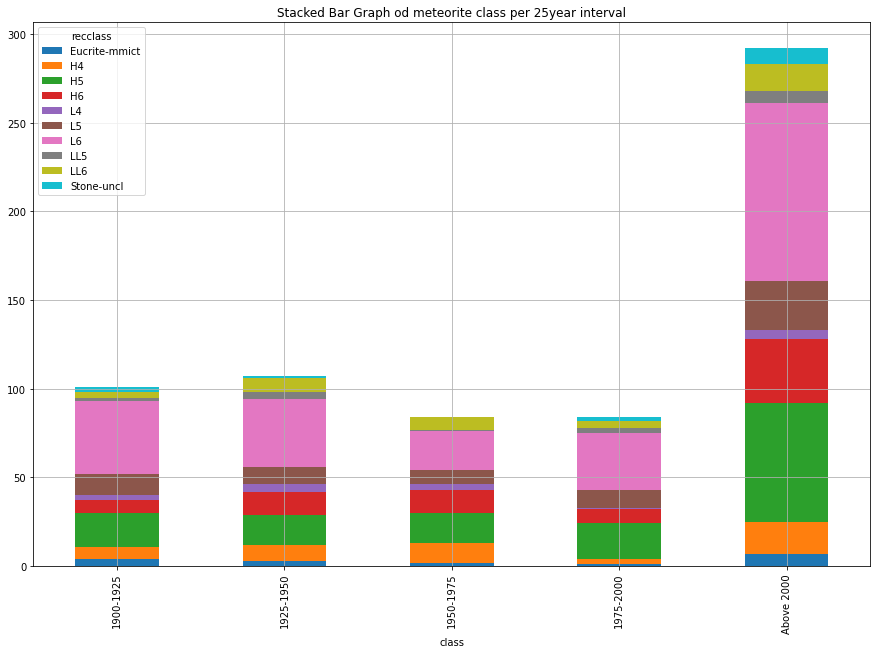

In [35]:
df_stacked.plot(x='class', kind='bar', stacked=True, 
                title='Stacked Bar Graph od meteorite class per 25year interval', figsize=(15, 10), grid=True)

The stacked bar chart clearly depicted  why L6 is the most frequent class of meteorite fall, as it has largest count in every 25 year interval of 20th century.
One more interesting insight was to find which 25 year interval had more diverse meteorite fall? In between year 1925 to 1950, about 9 types of meteorite have landed on earth.


## Highest average mass of meteriote fall by recorded class

In [36]:
df_mass_avg = df_mass.groupby(by="recclass")["mass"].mean().reset_index()

In [37]:
df_highest_mass = df_mass_avg.sort_values(by="mass", ascending=False)[0:10]

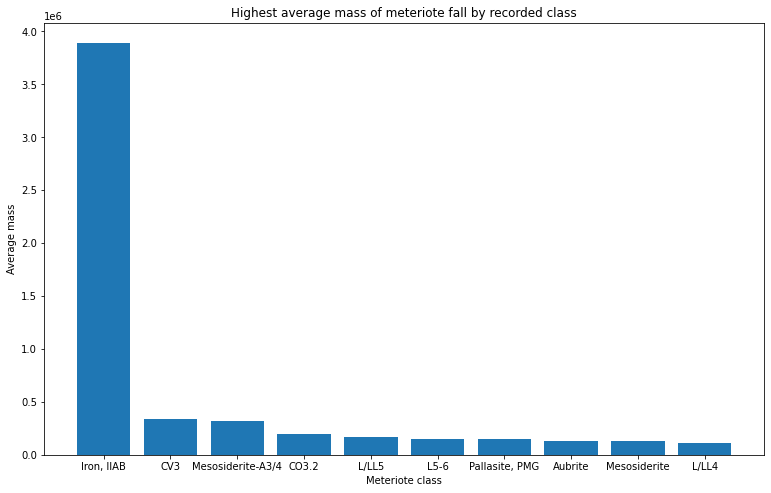

In [38]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(x=df_highest_mass["recclass"],height=df_highest_mass["mass"],width=0.8)
ax.set_title("Highest average mass of meteriote fall by recorded class")
ax.set_xlabel("Meteriote class")
ax.set_ylabel("Average mass")
plt.show()

The goal here is to find out which classes of meteriotes have highest average mass recorded. These kind of insights can be valuable in specialized research about those classes and their material properties.

Comments: Iron IIAB meteorite class
 have highest average mass (around)
4000 Kg!!!


In [39]:
df_iron_class = df_mass[df_mass["recclass"] == "Iron, IIAB"].sort_values(by="year")

<AxesSubplot:title={'center':'Iron, IIAB meteorite fall over the years'}, ylabel='year'>

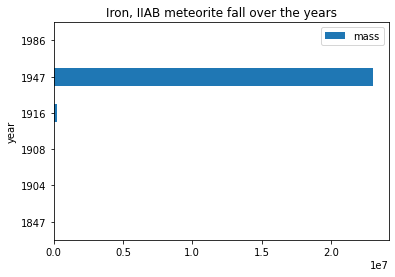

In [40]:
df_iron_class.plot(x="year",y="mass",kind="barh", title="Iron, IIAB meteorite fall over the years")

I plotted mass of Iron IIAB meteorite over the years, and realized a meteorite of massive size has landed in 1947 (explaining large average mass of this class). Out of curiosity, I searched about this event and ended up reading a wikipedia article over this meteorite  - Sikhote-Alin Meteorite. (Link:https://en.wikipedia.org/wiki/Sikhote-Alin_meteorite). It was interesting to get to know about this event through the process of data discovery.


## Part 3

In [41]:
def filterdf(term):
    return new_df[new_df['recclass'] == term]

def generate_mass_dist(term, bincount):
    focusset = filterdf(term)
    plt.hist(focusset['mass'], bins = bincount, log=True)
    plt.title("Mass Distribution of " + term +" Meteorites")
    plt.xlabel("Mass (grams)")
    plt.ylabel("Count of Meteorites")

In [42]:
class mass_dist(traitlets.HasTraits):
    recclass = traitlets.Unicode()
    bincount = traitlets.Int()

### Below is all my experimentation to get the implementation of these functions and the attempt at interactivity correct.

In [43]:
display(filterdf('L5'))

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,number_by_year
0,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",5
59,Ausson,4903,Valid,L5,50000,Fell,1858,43.08333,0.58333,"{'type': 'Point', 'coordinates': [0.58333, 43....",3
73,Banswal,4937,Valid,L5,14,Fell,1913,30.40000,78.20000,"{'type': 'Point', 'coordinates': [78.2, 30.4]}",4
81,Barwell,4954,Valid,L5,44000,Fell,1965,52.56528,-1.33972,"{'type': 'Point', 'coordinates': [-1.33972, 52...",4
83,Baszkówka,4957,Valid,L5,15500,Fell,1994,52.03333,20.93583,"{'type': 'Point', 'coordinates': [20.93583, 52...",6
...,...,...,...,...,...,...,...,...,...,...,...
930,Sixiangkou,23619,Valid,L5,630,Fell,1989,32.43333,119.86667,"{'type': 'Point', 'coordinates': [119.86667, 3...",6
972,Tadjera,23778,Valid,L5,9000,Fell,1867,36.18333,5.41667,"{'type': 'Point', 'coordinates': [5.41667, 36....",3
979,Tané,23801,Valid,L5,905,Fell,1918,35.43333,136.23333,"{'type': 'Point', 'coordinates': [136.23333, 3...",5
980,Taonan,23873,Valid,L5,3850,Fell,1965,45.40000,122.90000,"{'type': 'Point', 'coordinates': [122.9, 45.4]}",4


In [44]:
focusset = filterdf('L5')

In [45]:
focusset[focusset['name'] == 'Ausson']['mass'].describe()

count          1
mean     50000.0
std         <NA>
min        50000
25%        50000
50%        50000
75%        50000
max        50000
Name: mass, dtype: object

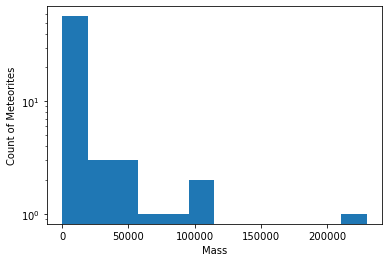

In [46]:
plt.hist(focusset['mass'], bins = 12, log=True);
plt.xlabel("Mass");
plt.ylabel("Count of Meteorites");

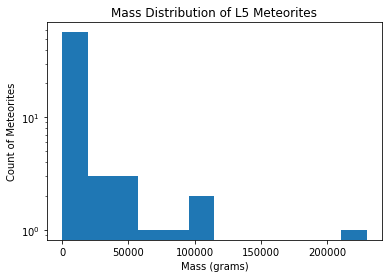

In [47]:
generate_mass_dist("L5", 12);

In [48]:
@ipywidgets.interact(recclass = new_df['recclass'].unique(), bincount = (0,15,1))
def generate_mass_dist(recclass, bincount):
    focusset = filterdf(recclass);
    plt.hist(focusset['mass'], bins = bincount, log=True);
    plt.title("Mass Distribution of " + recclass + " Meteorites")
    plt.xlabel("Mass (grams)");
    plt.ylabel("Count of Meteorites");

interactive(children=(Dropdown(description='recclass', options=('L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6…

## Part 4

## Occurrence of Different Types of Meteorite

Text(0.5, 1.0, 'Occurrence of Different Types of Meteorite')

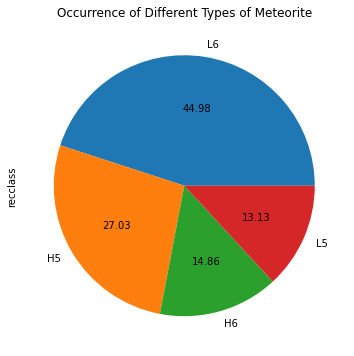

In [53]:
diff_rec = new_df['recclass'].value_counts()
diff_rec[diff_rec > 50].plot.pie(autopct='%.2f',figsize=(6,6))
plt.title('Occurrence of Different Types of Meteorite', fontsize=12)

In [50]:
L6 = new_df[new_df.recclass=='L6']
H5 = new_df[new_df.recclass=='H5']

<function matplotlib.pyplot.show(close=None, block=None)>

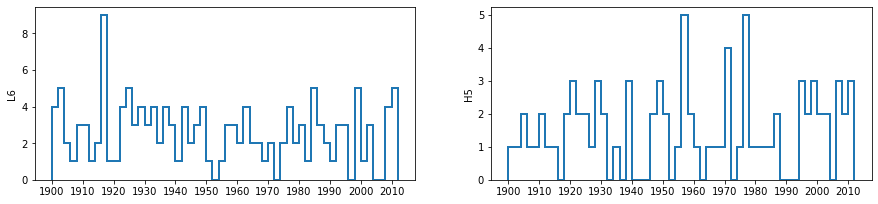

In [51]:
plt.figure(figsize=(15,7))

plt.subplot(221)
plt.hist(L6.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('L6')
plt.xticks(np.arange(1900,2015,10))

plt.subplot(222)
plt.hist(H5.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('H5')
plt.xticks(np.arange(1900,2015,10))
plt.show

## Discoveries Per Year and Discoveries Per Decade

(1900.0, 2018.0)

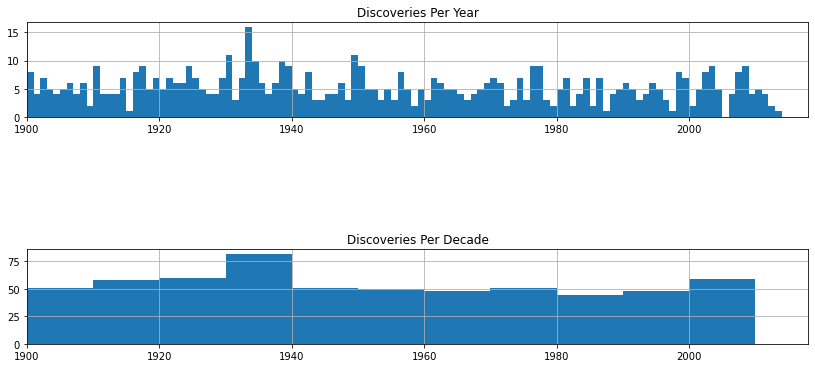

In [52]:
plt.subplot(411)
new_df.year.hist(bins=np.arange(1900,2018,1),figsize=(14,8))
plt.title('Discoveries Per Year')
plt.xlim(1900,2018)

plt.subplot(413)
new_df.year.hist(bins=np.arange(1900,2018,10),figsize=(14,8))
plt.title('Discoveries Per Decade')
plt.xlim(1900,2018)